# Polynomial Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features

---
# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## Sample Data

In [4]:
df = pd.read_csv('../../data/Advertising.csv')

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('sales', axis=1)

In [8]:
y = df['sales']

---
## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False) # for the given degree d, the number of features will be (n+d)!/n!d! where n is the number of original features
polynomial_converter.fit(X) # fit the transformer to the data, by default it considers all features in X
polynomial_converter.transform(X) # transform X to include polynomial features
X_poly = polynomial_converter.transform(X)
print(f"The new shape after transformation: {X_poly.shape}") # the resulting shape after adding polynomial features, where the number of features increased from 3 to 9, because we have 3 original features and degree=2, therefore (3+2)!/3!2! = 10 - 1 (bias) = 9 features

# we can also use fit_transform to do both fitting and transforming in one step
X_poly = polynomial_converter.fit_transform(X)
print(f"The new shape after transformation using fit_transform: {X_poly.shape}")

The new shape after transformation: (200, 9)
The new shape after transformation using fit_transform: (200, 9)


In [22]:
X.iloc[0] # the first original sample before transformation

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [23]:
X_poly[0] # the first sample after adding polynomial features

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [58]:
X_poly[0][:3]  # the first three features correspond to the original features (TV, radio, newspaper)

array([230.1,  37.8,  69.2])

In [59]:
X_poly[0][:3]**2

array([52946.01,  1428.84,  4788.64])

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [60]:
230.01*37.8 # this is the interaction term between TV and radio, which is the 7th feature in X_poly (index 6)

8694.377999999999

---
## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

---
### Model for fitting on Polynomial Data

#### Create an instance of the model with parameters

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

---
### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [29]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---
## Evaluation on the Test Set

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [30]:
test_predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [61]:
MAE

0.4896798044803838

In [37]:
RME

np.float64(0.6646431757269274)

---
### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

---
## Choosing a Model

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

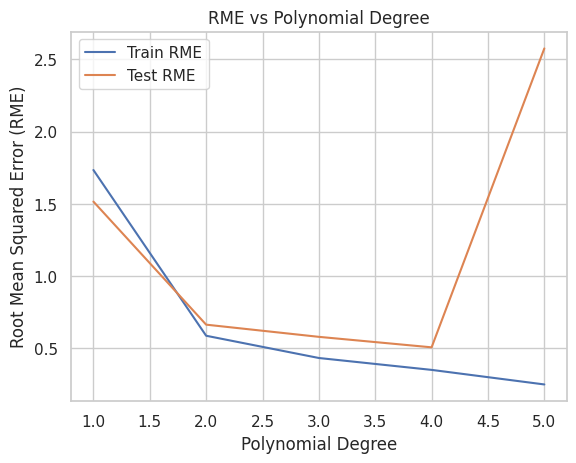

In [48]:
train_RME_list = []
test_RME_list = []
for degree in range(1, 10):
    X_poly = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_MSE = mean_squared_error(y_train, train_predictions)
    test_MSE = mean_squared_error(y_test, test_predictions)
    train_RME = np.sqrt(train_MSE)
    test_RME = np.sqrt(test_MSE)
    train_RME_list.append(train_RME)
    test_RME_list.append(test_RME)

plt.plot(range(1, 6), train_RME_list[:5], label='Train RME')
plt.plot(range(1, 6), test_RME_list[:5], label='Test RME')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error (RME)')
plt.title('RME vs Polynomial Degree')
plt.legend()
plt.show()

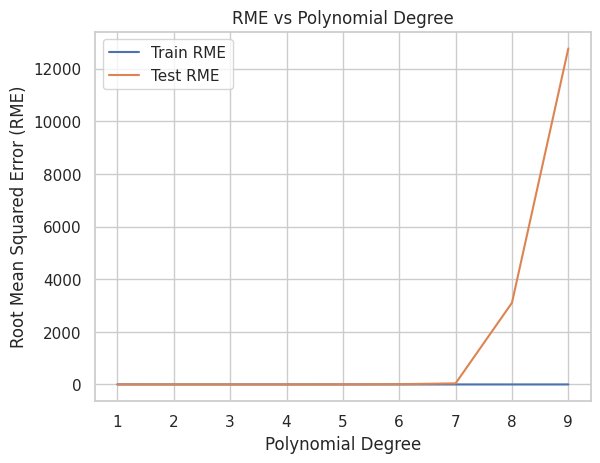

In [49]:
plt.plot(range(1, 10), train_RME_list, label='Train RME')
plt.plot(range(1, 10), test_RME_list, label='Test RME')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error (RME)')
plt.title('RME vs Polynomial Degree')
plt.legend()
plt.show()

---
## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [62]:
# Based on our chart, could have also been degree=4, but  it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---
### Saving Model and Converter

In [53]:
from joblib import dump, load
dump(final_model, '../../models/final_polynomial_regression_model.joblib')
dump(final_poly_converter, '../../models/final_polynomial_converter.joblib')

['../../models/final_polynomial_converter.joblib']

---
## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [54]:
loaded_model = load('../../models/final_polynomial_regression_model.joblib')
loaded_converter = load('../../models/final_polynomial_converter.joblib')

In [63]:
campaign_data = np.array([[149, 22, 12]]) # example data point

In [64]:
campaign_data_converted = loaded_converter.transform(campaign_data)

In [65]:
campaign_data_converted

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [66]:
final_model.predict(campaign_data_converted)

array([14.64501014])